In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 19s 2us/step


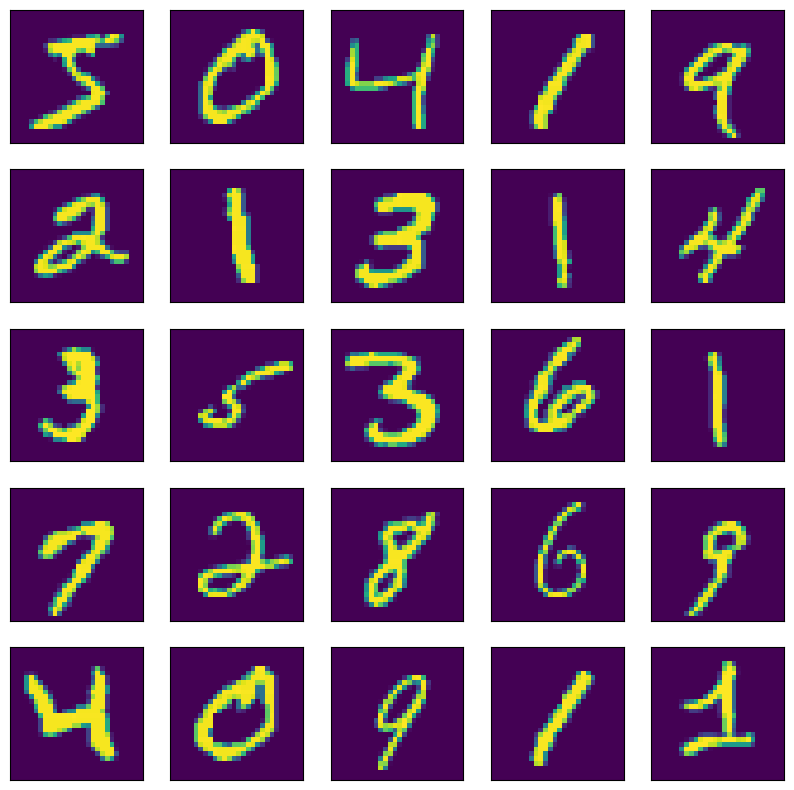

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
plt.show()

In [22]:
x_train[0].shape

(28, 28)

In [24]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),        # (26,26,16)
    MaxPooling2D(),                                                     # (13,13,16)
    
    Conv2D(32, (3,3), activation='relu'),                               # (11,11,32)
    MaxPooling2D(),                                                     # (5,5,32)

    Flatten(),                                                          # 800
    Dense(256, activation='relu'),                                      # 256
    Dense(10,activation='softmax')                                      # 10
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,426 (829.79 KB)

 Trainable params: 212,426 (829.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8940 - loss: 1.3009 - val_accuracy: 0.9806 - val_loss: 0.0706
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9804 - loss: 0.0646 - val_accuracy: 0.9809 - val_loss: 0.0604
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9843 - loss: 0.0487 - val_accuracy: 0.9805 - val_loss: 0.0639
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9874 - loss: 0.0394 - val_accuracy: 0.9836 - val_loss: 0.0604
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9890 - loss: 0.0365 - val_accuracy: 0.9823 - val_loss: 0.0626
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9921 - loss: 0.0260 - val_accuracy: 0.9860 - val_loss: 0.0457
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9826 - val_loss: 0.0635
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9942 - 

In [29]:
evaluation = model.evaluate(x_test)

ValueError: None values not supported.